In [4]:
#IMPORTANDO LIBRERIAS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
#from pycaret.classification import *

In [5]:
#IMPORTANDO  EL DATASET Y MOSTRANDOLO

df=pd.read_csv('dataset_full.csv')
df

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


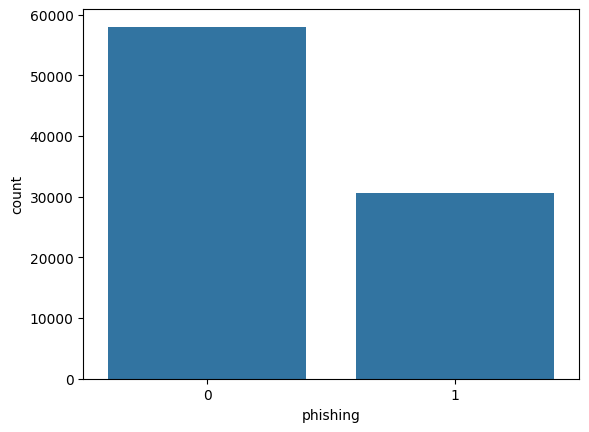

In [6]:
#VISUALIZANDO LA DISTRIBUCION DEL CONJUNTO DE DATOS

sns.countplot(x='phishing', data=df)
plt.show()

In [7]:
print(df.columns)

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url',
       ...
       'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
       'domain_google_index', 'url_shortened', 'phishing'],
      dtype='object', length=112)


In [8]:
cols_to_drop = ['url_google_index',
                  'domain_google_index',
                  'qty_vowels_domain',
                  'server_client_domain',
                  'tld_present_params',
                  'time_response', 
                  'domain_spf', 
                  'qty_ip_resolved', 
                  'qty_nameservers', 
                  'qty_mx_servers', 
                  'ttl_hostname', 
                  'url_shortened']

df=df.drop(cols_to_drop, axis=1)

In [9]:
#LIMPIAMOS Y ANALIZAMOS LOS DATOS, PARA PODER VISUALIZARLTRABAJARLO MEJOR Y ASI VISUALIZARLO
rows, columns = df.shape

original_features = list(df.columns)

dataset_array = np.array(df)

features_indices = []
attributes = ['url', 'domain', 'directory', 'file', 'params']

new_dataset = {}

for index, name in enumerate(original_features):
    if 'qty' in name and name.split('_')[-1] in attributes:
        features_indices.append([index, name.split('_')[-1]])
    else:
        new_dataset[name] = dataset_array[:, index]


for index, attribute in features_indices:
  if attribute == 'domain':
    if f"qty_char_{attribute}" not in new_dataset.keys():
        new_dataset[f"qty_char_{attribute}"] = np.zeros(rows)
    
    new_dataset[f"qty_char_{attribute}"] += dataset_array[:,index]

df1 = pd.DataFrame(new_dataset).astype(int)
df1[df1<-1] = -1
df1

,length_url,domain_length,domain_in_ip,directory_length,file_length,params_length,email_in_url,asn_ip,time_domain_activation,time_domain_expiration,tls_ssl_certificate,qty_redirects,phishing,qty_char_domain
0,25,17,0,8,7,-1,0,60781,-1,-1,0,0,1,2
1,223,16,0,42,9,165,0,36024,579,150,1,0,1,2
2,15,14,0,1,0,-1,0,4766,-1,-1,1,0,0,2
3,81,19,0,62,9,-1,0,20454,-1,-1,1,0,1,2
4,19,19,0,-1,-1,-1,0,53831,6998,306,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,23,23,0,-1,-1,-1,0,8560,5509,334,0,0,0,4
88643,34,34,0,-1,-1,-1,0,26496,5046,431,0,2,0,2
88644,70,22,0,48,11,-1,0,394695,1844,712,1,0,1,1
88645,28,27,0,1,0,-1,0,47583,-1,-1,1,0,1,2


In [10]:
#MUESTRO LA RELACIONES ENTRE LOS DATOS 
correlations = df1.corr(method='pearson')
correlations

,length_url,domain_length,domain_in_ip,directory_length,file_length,params_length,email_in_url,asn_ip,time_domain_activation,time_domain_expiration,tls_ssl_certificate,qty_redirects,phishing,qty_char_domain
length_url,1.000000,0.127817,0.013114,0.645046,0.416752,0.836753,0.251283,0.018416,-0.202164,-0.077349,-0.026460,-0.042922,0.449771,-0.007030
domain_length,0.127817,1.000000,-0.037586,-0.017743,-0.017328,-0.007329,-0.010760,-0.026017,-0.134112,-0.101161,-0.006179,-0.045063,0.009736,0.555000
domain_in_ip,0.013114,-0.037586,1.000000,0.027753,0.013709,0.004108,-0.006514,-0.005145,-0.040853,-0.028132,-0.048290,-0.017889,0.058101,0.057764
directory_length,0.645046,-0.017743,0.027753,1.000000,0.685310,0.159445,0.140095,0.030956,-0.215052,-0.062806,-0.016483,-0.008365,0.525694,-0.105737
file_length,0.416752,-0.017328,0.013709,0.685310,1.000000,0.078641,0.060630,0.013947,-0.121585,-0.032850,0.011882,0.029125,0.255057,-0.044911
params_length,0.836753,-0.007329,0.004108,0.159445,0.078641,1.000000,0.231760,0.008048,-0.096837,-0.040204,-0.020954,-0.044239,0.232992,-0.041832
email_in_url,0.251283,-0.010760,-0.006514,0.140095,0.060630,0.231760,1.000000,0.025840,-0.071312,-0.019440,-0.020516,-0.033024,0.187812,-0.065838
asn_ip,0.018416,-0.026017,-0.005145,0.030956,0.013947,0.008048,0.025840,1.000000,-0.023435,-0.014937,-0.001470,0.017999,0.091654,-0.010777
time_domain_activation,-0.202164,-0.134112,-0.040853,-0.215052,-0.121585,-0.096837,-0.071312,-0.023435,1.000000,0.398820,0.062162,0.133949,-0.441875,-0.009578
time_domain_expiration,-0.077349,-0.101161,-0.028132,-0.062806,-0.032850,-0.040204,-0.019440,-0.014937,0.398820,1.000000,0.090065,0.084400,-0.165915,-0.076116


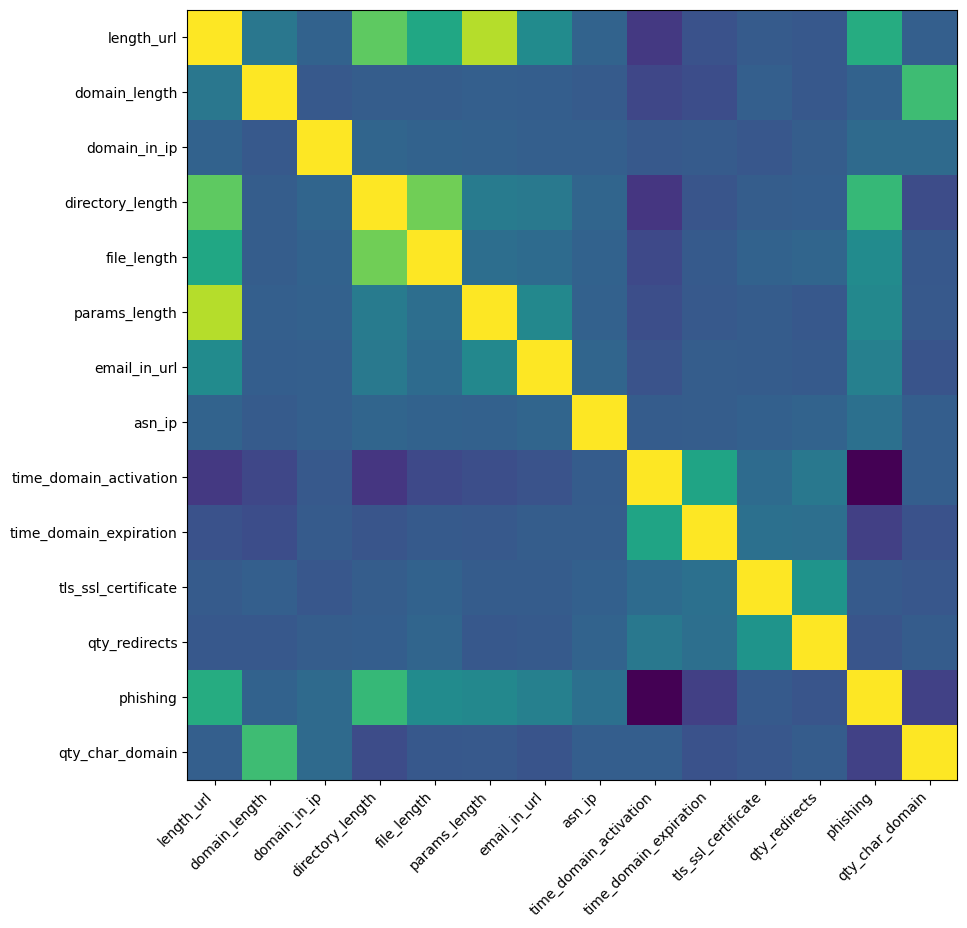

In [11]:
import matplotlib.pyplot as plt

labels = df1.columns.to_list()
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow((df1.corr().to_numpy()))
ax.set_xticks(np.arange(0, len(labels)))
ax.set_xticklabels(df1.columns.to_list(), rotation=45, ha='right')
ax.set_yticks(np.arange(0, len(labels)))
ax.set_yticklabels(df1.columns.to_list(), ha='right');

In [12]:
#RESUMEN ESTADISTICO DEL DATASET
df.describe() # Resumen estadistico

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_percent_params,params_length,qty_params,email_in_url,asn_ip,time_domain_activation,time_domain_expiration,tls_ssl_certificate,qty_redirects,phishing
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,...,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000
mean,2.191343,0.328810,0.113879,1.281781,0.009329,0.205861,0.022133,0.140885,0.002944,0.001015,...,-0.862105,5.273185,-0.759744,0.018331,31131.152763,3389.676661,352.043250,0.506447,0.343903,0.345720
std,1.235636,1.119286,0.657767,1.893929,0.112568,0.954272,0.279652,0.924864,0.087341,0.072653,...,1.050527,34.937007,0.941208,0.134147,45261.502645,3044.165723,598.264801,0.499961,0.783892,0.475605
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,0.000000,13335.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,0.000000,20013.000000,3046.000000,168.000000,1.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,0.000000,34922.000000,6423.000000,354.000000,1.000000,1.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,65.000000,4094.000000,23.000000,1.000000,395754.000000,17775.000000,22574.000000,1.000000,17.000000,1.000000


array([[<Axes: title={'center': 'length_url'}>,
        <Axes: title={'center': 'domain_length'}>,
        <Axes: title={'center': 'domain_in_ip'}>,
        <Axes: title={'center': 'directory_length'}>],
       [<Axes: title={'center': 'file_length'}>,
        <Axes: title={'center': 'params_length'}>,
        <Axes: title={'center': 'email_in_url'}>,
        <Axes: title={'center': 'asn_ip'}>],
       [<Axes: title={'center': 'time_domain_activation'}>,
        <Axes: title={'center': 'time_domain_expiration'}>,
        <Axes: title={'center': 'tls_ssl_certificate'}>,
        <Axes: title={'center': 'qty_redirects'}>],
       [<Axes: title={'center': 'phishing'}>,
        <Axes: title={'center': 'qty_char_domain'}>, <Axes: >, <Axes: >]],
      dtype=object)

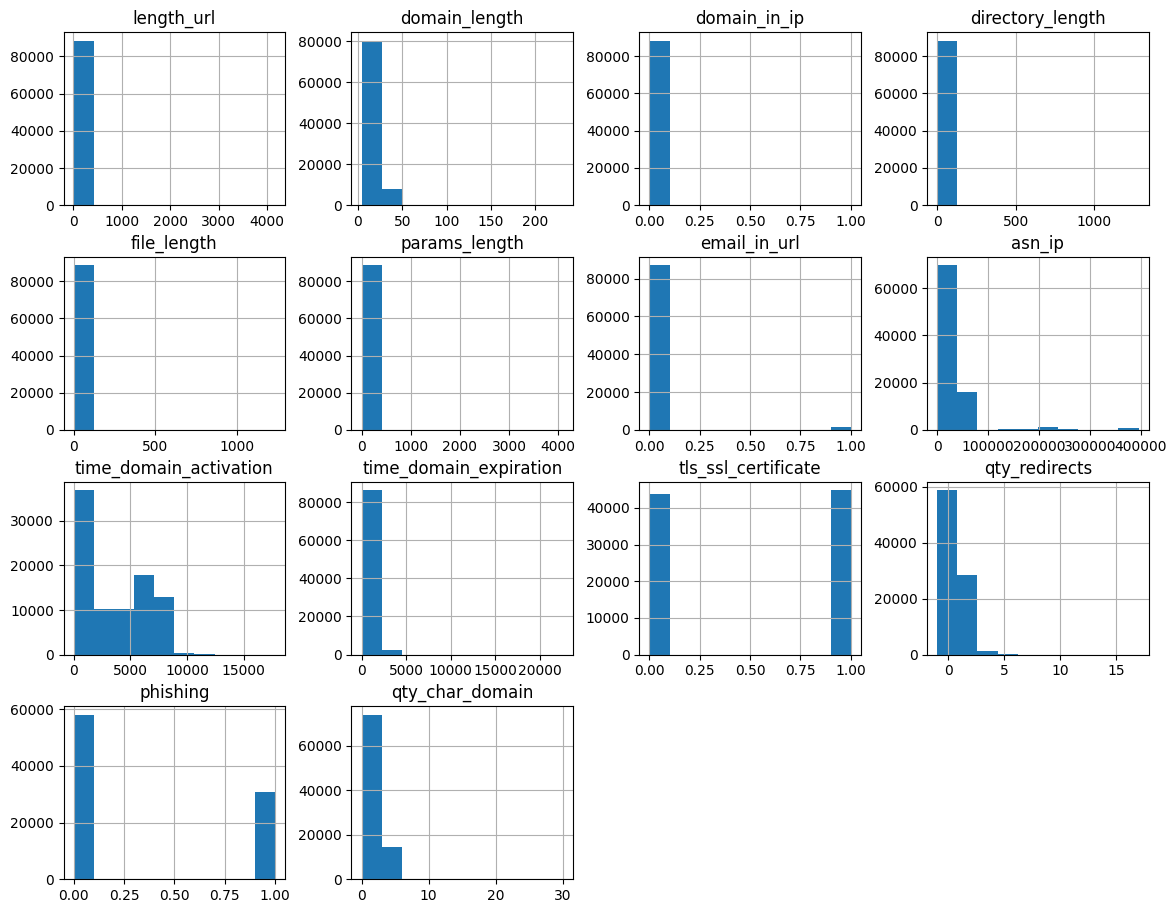

In [13]:
# Muestro histogramas de las variables de entrada para vizualizar valores atípicos
df1.hist(figsize=(14, 11))

In [17]:
#NORMALIZO MIS DATOS 
column = ["length_url","domain_length","domain_in_ip","directory_length","file_length","params_length","email_in_url","asn_ip",	"time_domain_activation","time_domain_expiration","tls_ssl_certificate","qty_redirects","phishing","qty_char_domain"]

df1[column]=df1[column] / df1[column].max()

df1.describe()

,length_url,domain_length,domain_in_ip,directory_length,file_length,params_length,email_in_url,asn_ip,time_domain_activation,time_domain_expiration,tls_ssl_certificate,qty_redirects,phishing,qty_char_domain
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000
mean,0.008727,0.080350,0.002267,0.008443,0.002227,0.001288,0.018331,0.078663,0.190699,0.015595,0.506447,0.020230,0.345720,0.066199
std,0.011090,0.028566,0.047564,0.018937,0.011016,0.008534,0.134147,0.114368,0.171261,0.026502,0.499961,0.046111,0.475605,0.027895
min,0.000960,0.017316,0.000000,-0.000778,-0.000812,-0.000244,0.000000,-0.000003,-0.000056,-0.000044,0.000000,-0.058824,0.000000,0.000000
25%,0.004082,0.060606,0.000000,-0.000778,-0.000812,-0.000244,0.000000,0.033695,-0.000056,-0.000044,0.000000,0.000000,0.000000,0.066667
50%,0.005282,0.077922,0.000000,-0.000778,-0.000812,-0.000244,0.000000,0.050569,0.171364,0.007442,1.000000,0.000000,0.000000,0.066667
75%,0.009124,0.095238,0.000000,0.012442,0.000000,-0.000244,0.000000,0.088242,0.361350,0.015682,1.000000,0.058824,1.000000,0.066667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
from sklearn.model_selection import train_test_split

features = ["length_url","domain_length","domain_in_ip","directory_length","file_length","params_length","email_in_url","asn_ip",	"time_domain_activation","time_domain_expiration","tls_ssl_certificate","qty_redirects","qty_char_domain"]

X = df1[features].values
Y = df1["phishing"].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

# Número de registros de entrenamiento
n = X_train.shape[0]
print(n)

# Inicializar los pesos y sesgos de la red neuronal
w_hidden = np.random.rand(13, 13)
w_output = np.random.rand(1, 13)

b_hidden = np.random.rand(13, 1)
b_output = np.random.rand(1, 1)

# Funciones de activacion (Leaky ReLU y Logistic)
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# Funcion que corre la red neuronal con los datos de entrada para predecir la salida
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

# Calculo de precisión
test_predictions = forward_prop(X_test.transpose())[3] # me interesa solo la capa de salida, A2
test_comparisons = np.equal((test_predictions <= .5).flatten().astype(int),Y_test)
accuracy = sum(test_comparisons.astype(int) / X_test.shape[0])

print("ACCURACY: ", accuracy)

59098
ACCURACY:  0.6556905479032902


In [ ]:
APLICO DESCENSO DE GRADIENTE ESTOCASTICO con varis capas

In [51]:
import numpy as np
import pandas as pd

# Número de características en tus datos
n_features = 13

# Inicialización de pesos y sesgos para la primera capa oculta
w_hidden1 = np.random.randn(16, n_features)  # 16 neuronas en la primera capa oculta
b_hidden1 = np.random.randn(16, 1)

# Inicialización de pesos y sesgos para la segunda capa oculta
w_hidden2 = np.random.randn(8, 16)  # 8 neuronas en la segunda capa oculta
b_hidden2 = np.random.randn(8, 1)

# Inicialización de pesos y sesgos para la capa de salida
w_output = np.random.randn(1, 8)  # 1 neurona en la capa de salida
b_output = np.random.randn(1, 1)

# Datos de entrenamiento y prueba (sólo como ejemplo, debes usar tus propios datos)
X_train = np.random.randn(100, n_features)  # 100 ejemplos de entrenamiento
Y_train = np.random.randint(0, 2, 100)      # 100 etiquetas de entrenamiento binarias
X_test = np.random.randn(20, n_features)    # 20 ejemplos de prueba
Y_test = np.random.randint(0, 2, 20)        # 20 etiquetas de prueba binarias
n = X_train.shape[0]

# Tasa de aprendizaje
L = 0.01

# Definición de funciones de activación y sus derivadas
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logistic_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# Forward propagation
def forward_prop(X):
    Z1 = w_hidden1 @ X + b_hidden1
    A1 = relu(Z1)
    Z2 = w_hidden2 @ A1 + b_hidden2
    A2 = relu(Z2)
    Z3 = w_output @ A2 + b_output
    A3 = sigmoid(Z3)
    return Z1, A1, Z2, A2, Z3, A3

# Backward propagation
def backward_prop(Z1, A1, Z2, A2, Z3, A3, X, Y):
    dC_dA3 = 2 * (A3 - Y)
    dA3_dZ3 = logistic_derivative(Z3)
    dZ3_dW3 = A2
    dZ3_dA2 = w_output
    dC_dZ3 = dC_dA3 * dA3_dZ3

    dC_dW3 = dC_dZ3 @ dZ3_dW3.T
    dC_dB3 = np.sum(dC_dZ3, axis=1, keepdims=True)

    dC_dA2 = dZ3_dA2.T @ dC_dZ3
    dA2_dZ2 = relu_derivative(Z2)
    dZ2_dW2 = A1
    dZ2_dA1 = w_hidden2
    dC_dZ2 = dC_dA2 * dA2_dZ2

    dC_dW2 = dC_dZ2 @ dZ2_dW2.T
    dC_dB2 = np.sum(dC_dZ2, axis=1, keepdims=True)

    dC_dA1 = dZ2_dA1.T @ dC_dZ2
    dA1_dZ1 = relu_derivative(Z1)
    dZ1_dW1 = X
    dC_dZ1 = dC_dA1 * dA1_dZ1

    dC_dW1 = dC_dZ1 @ dZ1_dW1.T
    dC_dB1 = np.sum(dC_dZ1, axis=1, keepdims=True)

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2, dC_dW3, dC_dB3

# Entrenamiento mediante descenso de gradiente
for i in range(100000):
    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx].reshape(1, 1)

    Z1, A1, Z2, A2, Z3, A3 = forward_prop(X_sample)
    dW1, dB1, dW2, dB2, dW3, dB3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, X_sample, Y_sample)

    w_hidden1 -= L * dW1
    b_hidden1 -= L * dB1
    w_hidden2 -= L * dW2
    b_hidden2 -= L * dB2
    w_output -= L * dW3
    b_output -= L * dB3

# Evaluación del modelo
test_predictions = forward_prop(X_test.transpose())[5]
test_predictions = (test_predictions >= 0.5).astype(int)
accuracy = np.mean(test_predictions == Y_test.reshape(1, -1))
print("ACCURACY: ", accuracy)


ACCURACY:  0.5


APLICAMOS DESCENSO DE GRADIENTE ESTOCASTICO

In [35]:

L = 0.001  # La tasa de aprendizaje

# Devuelve pendientes para pesos y sesgos
# usando la regla de la cadena

def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

# Ejecutar descenso de gradiente
for i in range(50000):
    # seleccionar aleatoriamente un conjunto de datos de entrenamiento
    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]

    # pasar datos seleccionados aleatoriamente a través de la red neuronal
    Z1, A1, Z2, A2 = forward_prop(X_sample)

    # distribuir error a través de la retropropagación
    # y devolver pendientes para pesos y sesgos
    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    # actualizar pesos y sesgos
    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2


    # Cálculo de precisión
test_predictions = forward_prop(X_test.transpose())[3]
test_predictions = (test_predictions >= 0.5).astype(int)  # Convertir las predicciones en valores binarios
accuracy = np.mean(test_predictions == Y_test.reshape(1, -1))  # Calcular la precisión comparando las predicciones con los valores reales

print("ACCURACY: ", accuracy)

# El valor de precisión (accuracy) es  94,90% (mayor q el anterior) indica la proporción de predicciones correctas realizadas 
# por la red neuronal en el conjunto de prueba (X_test) después de entrenarla mediante el descenso de gradiente. 

ACCURACY:  0.9066973501641341


In [ ]:
USAMOS SKLEARN CON SU CLASSIFIER PARA VER CUANTO DA

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

features = ["length_url","domain_length","domain_in_ip","directory_length","file_length","params_length","email_in_url","asn_ip",	"time_domain_activation","time_domain_expiration","tls_ssl_certificate","qty_redirects","qty_char_domain"]

X = df1[features].values
Y = df1["phishing"].values

# Normalizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Separar los datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=42)

# Crear el modelo
nn = MLPClassifier(solver='adam',
                   hidden_layer_sizes=(100, ),
                   activation='relu',
                   max_iter=100000,
                   learning_rate_init=0.01,
                   alpha=0.0001)

# Entrenar el modelo
nn.fit(X_train, Y_train)

# Imprimir pesos y sesgos
#print("Pesos de las capas:", nn.coefs_)
#print("Sesgos de las capas:", nn.intercepts_)

# Evaluar el modelo
train_score = nn.score(X_train, Y_train)
test_score = nn.score(X_test, Y_test)
print("Puntaje del conjunto de entrenamiento: %f" % train_score)
print("Puntaje del conjunto de prueba: %f" % test_score)

Puntaje del conjunto de entrenamiento: 0.951944
Puntaje del conjunto de prueba: 0.944939
